In [1]:
# Default imports to work with scipy and matplotlib
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

# Power generation grid optimization

We want to optimize the production of *green* electrical power from 3 kinds of power generators (hydro-based, solar-based and wind-based). The maximum power production of solar and wind generators depends on their primary energy source, on the contrary to hydro generators which have constant maximum power of 5kW per generator. We have predictions for available solar and wind power for the next day:

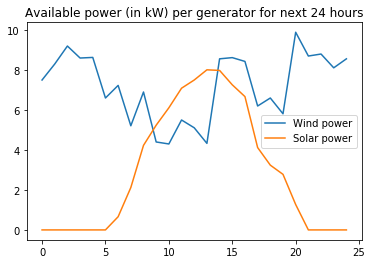

In [2]:
hours = np.linspace(0,24,25)
wind = np.array([7.5,8.3,9.2,8.6,8.63,6.6,7.23,5.21,6.9,4.4,4.3,5.5,5.11,4.33,8.56,8.62,8.43,6.2,6.6,5.81,9.89,8.7,8.8,8.11,8.56]) # in kW
solar = np.array([0,0,0,0,0,0,0.66,2.12,4.23,5.24,6.11,7.09,7.5,8.01,7.98,7.26,6.67,4.12,3.24,2.78,1.27,0,0,0,0])

plt.figure()
plt.plot(hours,wind,label="Wind power")
plt.plot(hours,solar,label="Solar power")
plt.title("Available power (in kW) per generator for next 24 hours")
plt.legend()
plt.show()

Our current power generation grid is based on 12 hydro generators, 10 solar generators and 8 wind generators.

Each kind of generator has specific costs (in euros) and operational constraints (in kW) when used. Some simplified assumptions were done for cost to obtain the following characteristics:

| Type | max power | cost/kWh     |
|------|-----------|--------------|
|Hydro |    5      |          2   |
|Solar |    8      |          1.5 |
|Wind  |    10     |          1.1 |


In fact, we want to define per hour which of the available generators we want to use.

We have to satisfy the following demand:


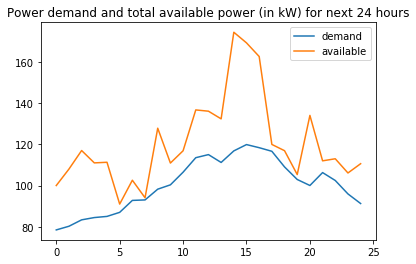

In [3]:
demand = np.array([78.45,80.23,83.34,84.45,85.01,86.98,92.78,93.01,98.23,100.34,106.48,113.52,115.02,111.21,116.82,119.89,118.38,116.63,109.04,102.94,100.02,106.29,102.45,95.93,91.26])

plt.figure()
plt.plot(hours,demand,label='demand')
plt.plot(hours,wind*10+solar*8+5*5,label='available')
plt.title("Power demand and total available power (in kW) for next 24 hours")
plt.legend()
plt.show()

## Optimization of current grid

We want to minimize the production cost for the demand of next 24 hours. In case, the demand cannot be satisfied by the green power generation, the corresponding energy quantity is bought to another company at a cost of 2.2€/kW.

### 1. Define the mathematical optimization problem for only deciding the next hour of production

In [12]:
from scipy.optimize import linprog

def mathematical_model(wind,solar,hydro,demand,hour):
    c=[1.1,1.5,2]                                                 #cost matrix
    A=[[-1,-1,-1],[1,0,0],[0,1,0],[0,0,1]]                        #A matrix; left-hand side of the constraints
    b=[-1*demand[hour],8*wind[hour],10*solar[hour],12*hydro]      #b matrix; right-hand side of the constraints
    bds=((0,None),(0,None),(0,None))                              #non negativity constraint for decision variables
    res=linprog(c,A,b,bounds=bds)
    dv=res.x                                                      #decision variables
    summation=dv[0]+dv[1]+dv[2]                                   # x1 + x2 + x3
    return print("Decision variables:",res.x,"Objective function:",res.fun,"\n Demand:",demand[hour],"\n x1+x2+x3=",summation)

wind1 = [7.5,8.3,9.2,8.6,8.63,6.6,7.23,5.21,6.9,4.4,4.3,5.5,5.11,4.33,8.56,8.62,8.43,6.2,6.6,5.81,9.89,8.7,8.8,8.11,8.56]
solar1 = [0,0,0,0,0,0,0.66,2.12,4.23,5.24,6.11,7.09,7.5,8.01,7.98,7.26,6.67,4.12,3.24,2.78,1.27,0,0,0,0]
hydro1 = 5
demand1 = [78.45,80.23,83.34,84.45,85.01,86.98,92.78,93.01,98.23,100.34,106.48,113.52,115.02,111.21,116.82,119.89,118.38,116.63,109.04,102.94,100.02,106.29,102.45,95.93,91.26]

myoptimization=mathematical_model(wind1,solar1,hydro1,demand1,0)







Decision variables: [ 60.     0.    18.45] Objective function: 102.9 
 Demand: 78.45 
 x1+x2+x3= 78.45


### 2. Solve it for the first hour and validate your model

In [14]:
print("x1: kWh produced by wind\n","x2:kWh produced by solar\n","x3:kWh produced by hydro\n","The summation of these variables should be at least 78.45")
Firsthour=mathematical_model(wind1,solar1,hydro1,demand1,0)

x1: kWh produced by wind
 x2:kWh produced by solar
 x3:kWh produced by hydro
 The summation of these variables should be at least 78.45
Decision variables: [ 60.     0.    18.45] Objective function: 102.9 
 Demand: 78.45 
 x1+x2+x3= 78.45


### 3. Define and solve the problem over the 24 hours


In [15]:
for i in range(25):
    print(str(i)+". hour:")
    myoptimization=mathematical_model(wind1,solar1,hydro1,demand1,i)
    

0. hour:
Decision variables: [ 60.     0.    18.45] Objective function: 102.9 
 Demand: 78.45 
 x1+x2+x3= 78.45
1. hour:
Decision variables: [ 66.4    0.    13.83] Objective function: 100.7 
 Demand: 80.23 
 x1+x2+x3= 80.23
2. hour:
Decision variables: [ 73.6    0.     9.74] Objective function: 100.44 
 Demand: 83.34 
 x1+x2+x3= 83.34
3. hour:
Decision variables: [ 68.8    0.    15.65] Objective function: 106.98 
 Demand: 84.45 
 x1+x2+x3= 84.45
4. hour:
Decision variables: [ 69.04   0.    15.97] Objective function: 107.884 
 Demand: 85.01 
 x1+x2+x3= 85.01
5. hour:
Decision variables: [ 52.8    0.    34.18] Objective function: 126.44 
 Demand: 86.98 
 x1+x2+x3= 86.98
6. hour:
Decision variables: [ 57.84   6.6   28.34] Objective function: 130.204 
 Demand: 92.78 
 x1+x2+x3= 92.78
7. hour:
Decision variables: [ 41.68  21.2   30.13] Objective function: 137.908 
 Demand: 93.01 
 x1+x2+x3= 93.01
8. hour:
Decision variables: [ 55.2   42.3    0.73] Objective function: 125.63 
 Demand: 98.23 

Previous assumptions are too basic to be realistics. In fact, the production costs are not linearly dependents of the power production. Then we consider the following functions to compute the cost from the produced power:

- hydro: $cost_h(power) = 0.88*log(1.18+power)$
- solar: $cost_s(power) = 0.05*exp(0.47*power)$
- wind: $cost_w(power)=0.0012*power^3+0.042$

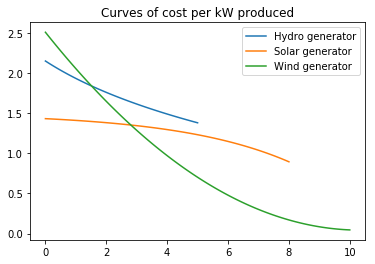

In [4]:

from numpy import log,exp
cost_h=lambda x: 3.27-0.88*log(3.58+x)
cost_s=lambda x: 1.5-0.07*exp(0.27*x)
cost_w=lambda x: 0.023*(x-10.35)**2+0.042
p_h = np.linspace(0,5,100)
p_s = np.linspace(0,8,100)
p_w = np.linspace(0,10,100)
c_h = cost_h(p_h)
c_s = cost_s(p_s)
c_w = cost_w(p_w)

plt.figure()
plt.plot(p_h,c_h,label="Hydro generator")
plt.plot(p_s,c_s,label="Solar generator")
plt.plot(p_w,c_w,label="Wind generator")
plt.title("Curves of cost per kW produced")
plt.legend()
plt.show()


### 4. Define a new model integrating these new cost functions and solve it for all the periods

In [1]:
import numpy as np
from numpy import log,exp
from scipy.optimize import minimize

demand = np.array([78.45,80.23,83.34,84.45,85.01,86.98,92.78,93.01,98.23,100.34,106.48,113.52,115.02,111.21,116.82,119.89,118.38,116.63,109.04,102.94,100.02,106.29,102.45,95.93,91.26])
wind = np.array([7.5,8.3,9.2,8.6,8.63,6.6,7.23,5.21,6.9,4.4,4.3,5.5,5.11,4.33,8.56,8.62,8.43,6.2,6.6,5.81,9.89,8.7,8.8,8.11,8.56]) # in kW
solar = np.array([0,0,0,0,0,0,0.66,2.12,4.23,5.24,6.11,7.09,7.5,8.01,7.98,7.26,6.67,4.12,3.24,2.78,1.27,0,0,0,0])

#x[0]: total energy produced by wind generator
#x[1]: total energy produced by solar generator
#x[2]: total energy produced by hydro generator

#Assumption: To simplify the cost function, I assume that the same amount of energy will be produced in each generator of the same type.

for i in range(25): #we will obtain a solution for each hour.
    def objective_fun(x): #total cost function
        return (0.023*((x[0]/8)-10.35)**2+0.042)*8+(1.5-0.07*exp(0.27*(x[1]/10)))*10+(3.27-0.88*log(3.58+(x[2]/12)))*12
    def constraint1(x):   #demand constraint
        return x[0]+x[1]+x[2]-demand[i]

    x0=np.zeros(3)
    x0[0]=1
    x0[1]=1
    x0[2]=1


    wind1=(0,wind[i]*8)
    solar1=(0,solar[i]*10)
    hydro1=(0,60)
    bnds=(wind1,solar1,hydro1) #bounds of decision variables
    con1= {'type': 'ineq', 'fun': constraint1} 
    cons=([con1])


    solution=minimize(objective_fun,x0,method='SLSQP',bounds=bnds,constraints=cons)
    dv=solution.x
    summation=dv[0]+dv[1]+dv[2]
    print(str(i)+". hour:")
    print("Decision variables:",solution.x,"Objective function:",solution.fun)
    print("Demand:",summation)

0. hour:
Decision variables: [ 60.   0.  60.] Objective function: 32.672517873441365
Demand: 120.0
1. hour:
Decision variables: [ 66.4   0.   60. ] Objective function: 31.951237873441364
Demand: 126.4
2. hour:
Decision variables: [ 73.6   0.   60. ] Objective function: 31.42131787344136
Demand: 133.6
3. hour:
Decision variables: [ 68.8   0.   60. ] Objective function: 31.74147787344137
Demand: 128.8
4. hour:
Decision variables: [ 69.04   0.    60.  ] Objective function: 31.72232347344136
Demand: 129.04
5. hour:
Decision variables: [ 52.8   0.   60. ] Objective function: 33.765477873441384
Demand: 112.8
6. hour:
Decision variables: [ 57.84   6.6   60.  ] Objective function: 32.83256245630336
Demand: 124.44
7. hour:
Decision variables: [ 41.68  21.2   60.  ] Objective function: 35.49842308111141
Demand: 122.88
8. hour:
Decision variables: [ 55.2  42.3  60. ] Objective function: 31.874698838767166
Demand: 157.5
9. hour:
Decision variables: [ 35.2  52.4  60. ] Objective function: 35.511073

## Power grid improvement

We want to study the possibility to buy a battery to store some power when possible. This will allow to satisfy power demand when solar and wind are not enough available and hydro power alone is not enough. Moreover, it reduces the risk to not satisfy the demand in case of a generator failure. Batteries can have various capacities. From a market study, we consider that 2500 euros per kWh is a relevant average price. The battery technology have a lifetime of about 18 months, considering hourly charge and discharge cycles.

This new battery within the grid may allow to shutdown the most expensive generators when enough power has been stored. Nevertheless, we want to keep at least 25kWh in the battery at the end of the 24 hours. With historical data about wind and solar conditions, we have globally excellent production conditions about 22% of the time (ie. >75% of maximum power) and bad conditions about 15% of the time (ie <30% of maximum power). The demand given for 24h can be considered of an average demand over the year. Season effects are neglected in this analysis.


### 1. Define the mathematical problem allowing to size battery storage and solve it

### 2. Update your previous model to optimize the energy production taking into account this new battery
